In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
data = pd.read_csv('daily-total-female-births-CA.csv')
print(data.shape)
data.head()

(365, 2)


,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [3]:
data.dtypes

date      object
births     int64
dtype: object

In [3]:
# we need the date as date datatype
data = pd.read_csv('daily-total-female-births-CA.csv', parse_dates=[0])
data.dtypes

date      datetime64[ns]
births             int64
dtype: object

        date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44


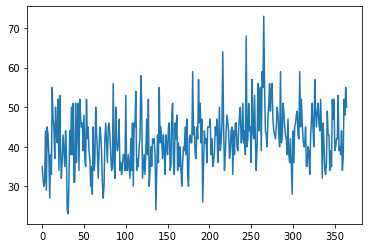

In [39]:
data_df = data.copy()
print(data_df.head())
data_df['births'].plot()

                 date  births
date                         
1959-01-01 1959-01-01      35
1959-01-02 1959-01-02      32
1959-01-03 1959-01-03      30
1959-01-04 1959-01-04      31
1959-01-05 1959-01-05      44


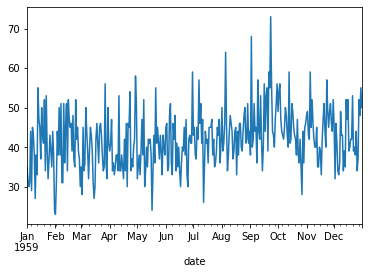

In [8]:
#data_df.index = data_df['date']
print(data_df.head())
data_df['births'].plot()

# Zooming in

In [40]:
data_df2 = data_df[(data_df['date'] > '1959-01-01') & (data_df['date'] <= '1959-01-10')].copy()
data_df2

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


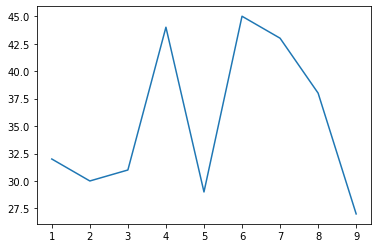

In [41]:
data_df2['births'].plot()

# trendline

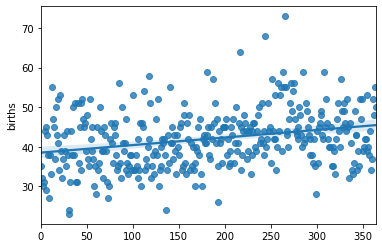

In [22]:
sns.regplot(x=data_df.index.values, y=data_df['births'])

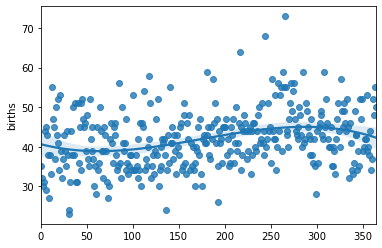

In [24]:
sns.regplot(x=data_df.index.values, y=data_df['births'], order=3)

# remove seasonality

In [44]:
data['month'] = data['date'].dt.month
data.head()

,date,births,year,month
0,1959-01-01,35,1959,1
1,1959-01-02,32,1959,1
2,1959-01-03,30,1959,1
3,1959-01-04,31,1959,1
4,1959-01-05,44,1959,1


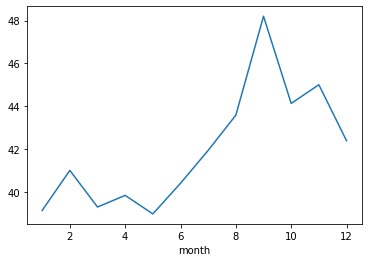

In [47]:
data.groupby('month')['births'].mean().plot()

# lag plots

In [49]:
data['lag'] = data['births'].shift(1)
data.head()

,date,births,year,month,lag
0,1959-01-01,35,1959,1,NaN
1,1959-01-02,32,1959,1,35.0
2,1959-01-03,30,1959,1,32.0
3,1959-01-04,31,1959,1,30.0
4,1959-01-05,44,1959,1,31.0


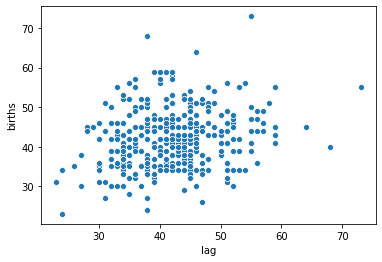

In [50]:
sns.scatterplot(x=data['lag'], y=data['births'])

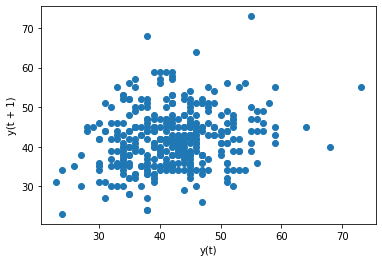

In [51]:
from pandas.plotting import lag_plot
lag_plot(data['births'])

# Autocorrelation plot

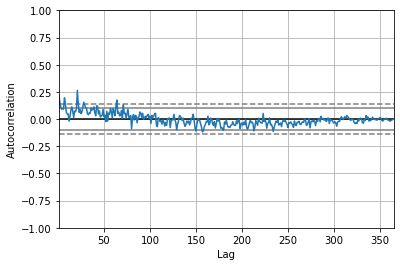

In [52]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['births'])

# feature engineering

In [54]:
# datetime features
data['year'] = data['date'].dt.year

In [55]:
#lag features
data['lag1'] = data['births'].shift(1)
data['lag2'] = data['births'].shift(365)

In [58]:
# window features
data['Rolling_mean'] = data['births'].rolling(window=2).mean()
data['Rolling_max'] = data['births'].rolling(window=3).max()

In [60]:
# expanding features
data['Expand_max'] = data['births'].expanding().max()

In [61]:
data.head()

,date,births,year,month,lag,lag1,lag2,Rolling_mean,Rolling_max,Expand_max
0,1959-01-01,35,1959,1,NaN,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,35.0,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,32.0,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,30.0,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,31.0,31.0,NaN,37.5,44.0,44.0


# downsampling and upsampling

In [6]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [63]:
data = data[['date', 'births']].copy()

In [4]:
quarterly_data = data.resample('Q', on='date').mean()
quarterly_data.head()

,births
date,
1959-03-31,39.766667
1959-06-30,39.725275
1959-09-30,44.532609
1959-12-31,43.826087


In [ ]:
daily_data = quarterly_data.resample('M', on='births').mean()
daily_data.head()

In [7]:
# in upsampling, we can get NaN in various rows and apply interpolate using linear approach

In [10]:
df = pd.read_csv('Electric_Production.csv', parse_dates=[0])
print(df.shape, df.dtypes)
df.head()

(397, 2) DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object


,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.index = df['DATE']

df.head()

,DATE,IPG2211A2N
DATE,,
1985-01-01,1985-01-01,72.5052
1985-02-01,1985-02-01,70.6720
1985-03-01,1985-03-01,62.4502
1985-04-01,1985-04-01,57.4714
1985-05-01,1985-05-01,55.3151


TypeError: 'Figure' object is not subscriptable

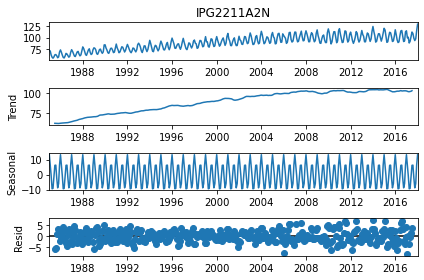

In [18]:
add_result = seasonal_decompose(df['IPG2211A2N'], model='additive')
add_result.plot()[0]

TypeError: 'Figure' object is not subscriptable

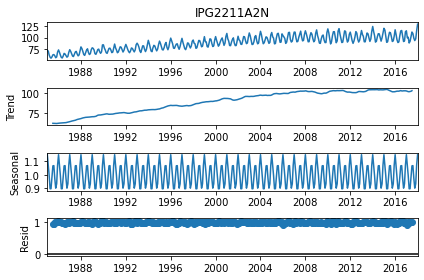

In [17]:
mul_result = seasonal_decompose(df['IPG2211A2N'], model='multiplicative')
mul_result.plot()[0]

# Differencing: remove trend and seasonality

In [21]:
df.head()

,DATE,IPG2211A2N
DATE,,
1985-01-01,1985-01-01,72.5052
1985-02-01,1985-02-01,70.6720
1985-03-01,1985-03-01,62.4502
1985-04-01,1985-04-01,57.4714
1985-05-01,1985-05-01,55.3151


In [22]:
df['lag1_diff'] = df['IPG2211A2N'].diff(periods=1)
df.head()

,DATE,IPG2211A2N,lag1_diff
DATE,,,
1985-01-01,1985-01-01,72.5052,NaN
1985-02-01,1985-02-01,70.6720,-1.8332
1985-03-01,1985-03-01,62.4502,-8.2218
1985-04-01,1985-04-01,57.4714,-4.9788
1985-05-01,1985-05-01,55.3151,-2.1563


TypeError: 'Figure' object is not subscriptable

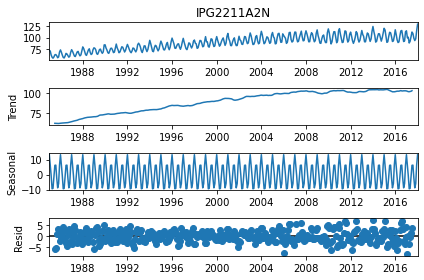

In [23]:
seasonal_decompose(df['IPG2211A2N'], model='additive').plot()[0]

TypeError: 'Figure' object is not subscriptable

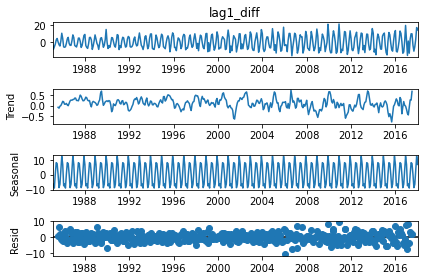

In [27]:
removed_trend = seasonal_decompose(df.iloc[1:,2], model='additive')
removed_trend.plot()[0]

In [31]:
df.head(15)

,DATE,IPG2211A2N,lag1_diff,lag12_diff
DATE,,,,
1985-01-01,1985-01-01,72.5052,NaN,NaN
1985-02-01,1985-02-01,70.6720,-1.8332,NaN
1985-03-01,1985-03-01,62.4502,-8.2218,NaN
1985-04-01,1985-04-01,57.4714,-4.9788,NaN
1985-05-01,1985-05-01,55.3151,-2.1563,NaN
1985-06-01,1985-06-01,58.0904,2.7753,NaN
1985-07-01,1985-07-01,62.6202,4.5298,NaN
1985-08-01,1985-08-01,63.2485,0.6283,NaN
1985-09-01,1985-09-01,60.5846,-2.6639,NaN


In [29]:
df['lag12_diff'] = df['lag1_diff'].diff(periods=12)
df.head()

,DATE,IPG2211A2N,lag1_diff,lag12_diff
DATE,,,,
1985-01-01,1985-01-01,72.5052,NaN,NaN
1985-02-01,1985-02-01,70.6720,-1.8332,NaN
1985-03-01,1985-03-01,62.4502,-8.2218,NaN
1985-04-01,1985-04-01,57.4714,-4.9788,NaN
1985-05-01,1985-05-01,55.3151,-2.1563,NaN


TypeError: 'Figure' object is not subscriptable

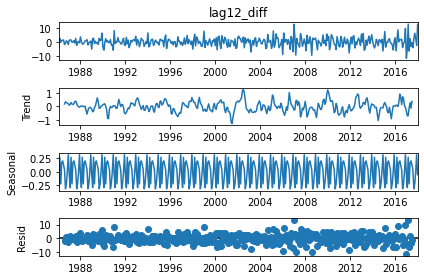

In [34]:
removed_seasonality = seasonal_decompose(df.iloc[13:,3], model='additive')
removed_seasonality.plot()[0]

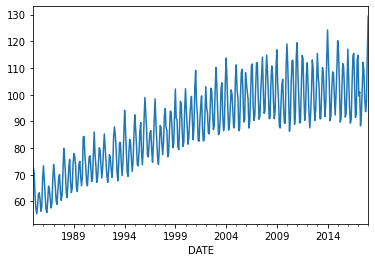

In [35]:
df['IPG2211A2N'].plot()

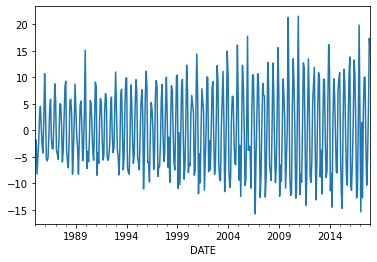

In [36]:
df['lag1_diff'].plot()

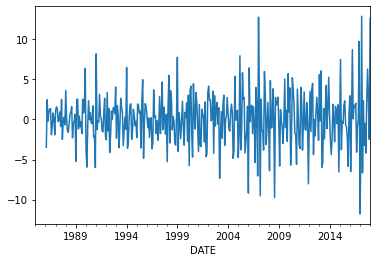

In [37]:
df['lag12_diff'].plot()